In [5]:
# Load libraries - ID3
import pandas as pd
import numpy as np
from id3 import Id3Estimator
from id3 import export_graphviz
import pydot


col_names = ['Windy', 'AirQualityGood', 'Hot', 'PlayTennis']
# load dataset
pima = pd.read_csv("C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW2_Submission/Tennis.csv")
print(pima)
pima['Windy'] = np.where(pima['Windy'] == 'Yes', 1, 0)
pima['AirQualityGood'] = np.where(pima['AirQualityGood'] == 'Yes', 1, 0)
pima['Hot'] = np.where(pima['Hot'] == 'Yes', 1, 0)
pima['PlayTennis'] = np.where(pima['PlayTennis'] == 'Yes', 1, 0)

print(pima)
#split dataset in features and target variable
feature_cols = ['Windy', 'AirQualityGood', 'Hot']
X = pima[feature_cols] # Features
y = pima.PlayTennis # Target variable


estimator = Id3Estimator()
estimator = estimator.fit(X, y)
export_graphviz(estimator.tree_, 'tree.dot', feature_cols)


(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('ID3.png')


  Windy AirQualityGood  Hot PlayTennis
0    No             No   No         No
1   Yes             No  Yes        Yes
2   Yes            Yes   No        Yes
3   Yes            Yes  Yes         No
   Windy  AirQualityGood  Hot  PlayTennis
0      0               0    0           0
1      1               0    1           1
2      1               1    0           1
3      1               1    1           0


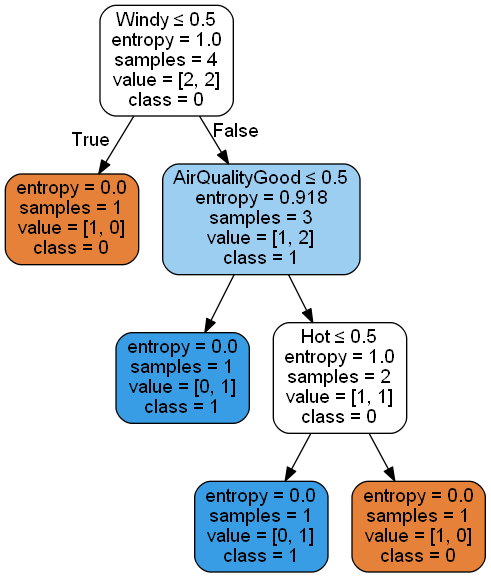

In [6]:
#4
# Load libraries -CART
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score #Import scikit-learn metrics module for accuracy calculation
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


col_names = ['Windy', 'AirQualityGood', 'Hot', 'PlayTennis']
## load dataset
## enter your file path with name here; given my local path
filename = "C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW2_Submission/Tennis.csv" 
data = pd.read_csv(filename)
data['Windy'] = np.where(data['Windy'] == 'Yes', 1, 0)
data['AirQualityGood'] = np.where(data['AirQualityGood'] == 'Yes', 1, 0)
data['Hot'] = np.where(data['Hot'] == 'Yes', 1, 0)
data['PlayTennis'] = np.where(data['PlayTennis'] == 'Yes', 1, 0)

#split dataset in features and target variable
feature_cols = ['AirQualityGood','Windy', 'Hot']
X = data[feature_cols] # Features
y = data.PlayTennis # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X,y)

'''
# without using training and test data 
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
'''


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Playtennis_DecisionTree.png')
Image(graph.create_png())